# Detekce jednoduchých obrazových vzorů

Vytvoříme jednoduchou neuronovou síť, která rozpozná "typ" obrázku 2x2:
- vyplněný
- vertikální
- horizontální
- diagonální

In [1]:
# import of common python libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
# set size to plots to 8, 4
plt.rcParams['figure.figsize'] = 8, 4
import seaborn as sns

In [2]:
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True

In [6]:
plt.rcParams['figure.figsize'] = 4, 2

Obrazová data lze zakódovat pomocí dvourozměrného pole. Neuronová síť bude mít ale na vstupu jednorozměrné pole, které následně přetvarujeme do potřebného tvaru 2x2. Hodnota 1 znamená plně rozsvícený pixel - tedy bílý, hodnota -1 představuje černý pixel.

In [3]:
x = np.array([-1, 0, 0.5, 1])

In [4]:
x.reshape(2, 2)

array([[-1. ,  0. ],
       [ 0.5,  1. ]])

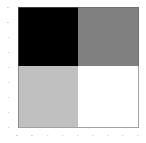

In [7]:
plt.imshow(x.reshape(2, 2), cmap=plt.cm.gray, interpolation='nearest', vmin=-1, vmax=1)

In [8]:
solid = np.array([1, 1, 1, 1])

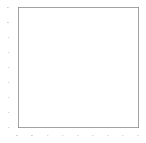

In [9]:
plt.imshow(solid.reshape(2, 2), cmap=plt.cm.gray, interpolation='nearest', vmin=-1, vmax=1)

In [10]:
vertical = np.array([1, -1, 1, -1])
diagonal = np.array([1, -1, -1, 1])
horizontal = np.array([1, 1, -1, -1])

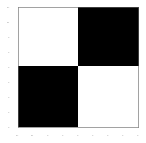

In [12]:
plt.imshow(diagonal.reshape(2, 2), cmap=plt.cm.gray, interpolation='nearest', vmin=-1, vmax=1)

Nyní přidáme další vrstvu, která bude mít receptivní pole ze dvou pixelů.

![Druhá vrstva](img/squares_2nd.jpg)

In [13]:
# receptivní pole - levá polovina čtverce
weight_white_left = np.array([1, 0, 1, 0])

In [15]:
weight_white_left, solid

(array([1, 0, 1, 0]), array([1, 1, 1, 1]))

In [16]:
weight_white_left * solid

array([1, 0, 1, 0])

In [17]:
np.sum(weight_white_left * solid)

2

In [18]:
# předchozí dvě operace dohromady tvoří tzv. dot product, skalární součin
np.dot(weight_white_left, solid)

2

In [19]:
# v pythonu lze pro dot product použít také @
weight_white_left @ solid

2

In [20]:
np.tanh(weight_white_left @ solid)

0.9640275800758169

In [21]:
# pravá polovina čtverce
weight_white_right = np.array([0, 1, 0, 1])
# levá polovina, nahoře bílá, dole černá
weight_mixed_left = np.array([1, 0, -1, 0])
# pravá polovina, nahoře bílá, dole černá
weight_mixed_right = np.array([0, 1, 0, -1])

In [23]:
np.tanh(weight_mixed_left @ diagonal)

0.9640275800758169

In [24]:
# všechny váhy lze zkombinovat - a získat neurony ve druhé vrstvě, které budou postupně detekovat tyto čtyři kombinace
weight1 = np.vstack([weight_white_left, weight_white_right, weight_mixed_left, weight_mixed_right])
weight1

array([[ 1,  0,  1,  0],
       [ 0,  1,  0,  1],
       [ 1,  0, -1,  0],
       [ 0,  1,  0, -1]])

In [25]:
np.tanh(weight1 @ diagonal)

array([ 0.        ,  0.        ,  0.96402758, -0.96402758])

In [27]:
# umíme detekovat například černý sloupec vlevo?
np.tanh(weight1 @ -solid)

array([-0.96402758, -0.96402758,  0.        ,  0.        ])

Třetí vrstva bude mít jako receptivní pole již celý čtverec.

![Třetí vrstva](img/squares_3rd.jpg)

In [28]:
# Další vrstva zkombinuje předchozí neurony do receptivního pole pokrývajícího celý čtverec.
#   - bílá vlevo + bílá vpravo = celá bílá
#   - bílá vlevo + černá vpravo (negativní bílá vpravo) = vertikální
#   - mixed vlevo + mixed vpravo = horizontální
#   - mixed vlevo + obrácená mixed vpravo = diagonální

weight_solid = np.array([1, 1, 0, 0])
weight_vertical = np.array([1, -1, 0, 0])
weight_horizontal = np.array([0, 0, 1, 1])
weight_diagonal = np.array([0, 0, 1, -1])

In [ ]:
np.tanh(weight_vertical @ np.tanh(weight1 @ -vertical))

In [29]:
# všechny váhy lze opět zkombinovat
weight2 = np.vstack([weight_solid, weight_vertical, weight_horizontal, weight_diagonal])

In [31]:
np.tanh(weight2 @ np.tanh(weight1 @ solid))

array([0.95857591, 0.        , 0.        , 0.        ])

Nyní již dokážeme detekovat všechny požadované vzory. Pokud nás nezajímá, zdali je vyplněný čtverec černý nebo bílý, můžeme výstup doplnit o absolutní hodnotu. V neuronových sítích se namísto absolutní hodnoty častěji používá tzv. ReLU aktivace, Rectified Linear Unit.

In [32]:
def relu(x):
    return np.maximum(0, x)

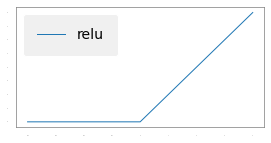

In [33]:
xs = np.linspace(-4, 4, 101)
ys = relu(xs)
sns.lineplot(xs, ys, label='relu')

In [34]:
weight3 = np.array([
    [1, 0, 0, 0],
    [-1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, -1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, -1]
])

In [35]:
relu(weight3 @ np.tanh(weight2 @ np.tanh(weight1 @ -solid)))

array([0.        , 0.95857591, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [36]:
weight4 = np.array([
    [1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1]
])

In [39]:
weight4 @ relu(weight3 @ np.tanh(weight2 @ np.tanh(weight1 @ solid)))

array([0.95857591, 0.        , 0.        , 0.        ])

In [40]:
# Takto použitá ReLU vrstva funguje jako absolutní hodnota.
# V tomto jednoduchém příkladu samozřejmě můžeme použít absolutní hodnotu.
# V mnoha aplikacích neuronových sítí je ReLU aktivace více užitečná.
np.abs(np.tanh(weight2 @ np.tanh(weight1 @ -diagonal)))

array([0.        , 0.        , 0.        , 0.95857591])

[0.77 0.48 0.52 0.86]


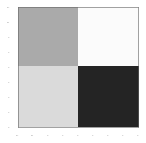

In [43]:
# Co se stane, pokud obrázek nebude přesně jeden z těchto typů?
# Výstupní neurony jsou postupně: solid, vertical, horizontal, diagonal
image = np.random.uniform(-1, 1, size=4)
plt.imshow(image.reshape(2, 2), cmap=plt.cm.gray, interpolation='nearest', vmin=-1, vmax=1)
print(np.round(np.abs(np.tanh(weight2 @ np.tanh(weight1 @ image))), 2))

Pokud bychom v praxi museli pro každou aplikaci vymyslet všechny váhy mezi neurony a nastavit je ručně, neuronové sítě by nebyly příliš užitečné. Skutečně užitečné neuronové sítě mají často milióny parametrů. Úspěšnost neuronových sítí pramení z toho, že jsou schopné automaticky nalézt váhy na základě vstupních tréninkových dat.